# NBA Players Exploratory Analysis Project

This project explores various data from a sample of 4685 NBA Players between 1985 and 2018. This data set was provided by Chris Davis on data.world and was sourced from basketball-reference.com. The data used in this project came in two parts.

- "players" - data about each individual player

- "salaries_1985to2018" - salary information for each player through each season

In [1]:
#importing necessary modules
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#loading csv files into pandas dataframes
df_players=pd.read_csv('/Volumes/Volume D/Portfolio/NBA_Player_Project/players.csv')

In [3]:
df_salary=pd.read_csv('/Volumes/Volume D/Portfolio/NBA_Player_Project/salaries_1985to2018.csv')

In [4]:
df_players.shape

(4685, 24)

In [5]:
df_players.tail()

,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
4680,zizican01,"January 4, 1997","Split, Croatia",0.6,58.3,-,70.8,91,17.5,6.4,...,23rd overall,1st round,Boston Celtics,2016,6-11,NaN,Ante Zizic,Center,Right,254lb
4681,zoetji01,"December 20, 1953","Uxbridge, Canada",0.1,20.0,-,-,7,-0.8,0.3,...,NaN,NaN,NaN,NaN,7-1,"Port Perry in Port Perry, Canada",Jim Zoet,Center,Right,240lb
4682,zopfbi01,"June 7, 1948",NaN,1.4,36.3,NaN,55.6,53,9.6,2.2,...,33rd overall,2nd round,Milwaukee Bucks,1970,6-1,"Monaca in Monaca, Pennsylvania",Bill Zopf,Point Guard,Right,170lb
4683,zubaciv01,"March 18, 1997","Mostar, Bosnia and Herzegovina",0.8,54.0,0.0,76.1,140,17.6,6.9,...,32nd overall,2nd round,Los Angeles Lakers,2016,7-1,NaN,Ivica Zubac,Center,Right,240lb
4684,zunicma01,"December 19, 1919","Renton, Pennsylvania",0.9,30.3,NaN,70.6,56,-,4.9,...,NaN,1947 BAA Draf,Washington Capitols,NaN,6-3,NaN,Matt Zunic,Guard/Forward,Right,195lb


In [6]:
df_salary.shape

(14163, 7)

In [7]:
df_salary.head(15)

,league,player_id,salary,season,season_end,season_start,team
0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings
5,NBA,abdulka01,1530000,1984-85,1985,1984,Los Angeles Lakers
6,NBA,abdulka01,2030000,1985-86,1986,1985,Los Angeles Lakers
7,NBA,abdulka01,2000000,1987-88,1988,1987,Los Angeles Lakers
8,NBA,abdulka01,3000000,1988-89,1989,1988,Los Angeles Lakers
9,NBA,abdulma02,1660000,1990-91,1991,1990,Denver Nuggets


In [8]:
# split player names by space b/w first and last name
df_name = df_players['name'].str.split(' ',expand=True)

# drop columns without values
df_name = df_name.drop(df_name.columns[[2,3]], axis=1)
df_name


,0,1
0,Alaa,Abdelnaby
1,Zaid,Abdul-Aziz
2,Kareem,Abdul-Jabbar
3,Mahmoud,Abdul-Rauf
4,Tariq,Abdul-Wahad
...,...,...
4680,Ante,Zizic
4681,Jim,Zoet
4682,Bill,Zopf
4683,Ivica,Zubac


In [9]:
# join first and last name columns into df_players
df_players = df_players.join(df_name)
df_players

,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,draft_team,draft_year,height,highSchool,name,position,shoots,weight,0,1
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb,Alaa,Abdelnaby
1,abdulza01,"April 7, 1946","Brooklyn, New York",1.2,42.8,NaN,72.8,505,15.1,9.0,...,Cincinnati Royals,1968,6-9,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward and Center,Right,235lb,Zaid,Abdul-Aziz
2,abdulka01,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,24.6,...,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb,Kareem,Abdul-Jabbar
3,abdulma02,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,586,15.4,14.6,...,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb,Mahmoud,Abdul-Rauf
4,abdulta01,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,236,11.4,7.8,...,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb,Tariq,Abdul-Wahad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,zizican01,"January 4, 1997","Split, Croatia",0.6,58.3,-,70.8,91,17.5,6.4,...,Boston Celtics,2016,6-11,NaN,Ante Zizic,Center,Right,254lb,Ante,Zizic
4681,zoetji01,"December 20, 1953","Uxbridge, Canada",0.1,20.0,-,-,7,-0.8,0.3,...,NaN,NaN,7-1,"Port Perry in Port Perry, Canada",Jim Zoet,Center,Right,240lb,Jim,Zoet
4682,zopfbi01,"June 7, 1948",NaN,1.4,36.3,NaN,55.6,53,9.6,2.2,...,Milwaukee Bucks,1970,6-1,"Monaca in Monaca, Pennsylvania",Bill Zopf,Point Guard,Right,170lb,Bill,Zopf
4683,zubaciv01,"March 18, 1997","Mostar, Bosnia and Herzegovina",0.8,54.0,0.0,76.1,140,17.6,6.9,...,Los Angeles Lakers,2016,7-1,NaN,Ivica Zubac,Center,Right,240lb,Ivica,Zubac


In [10]:
# rename _id column to id
df_players.rename(columns={df_players.columns[0]:'id'}, inplace=True)
df_players.head(1)

,id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,draft_team,draft_year,height,highSchool,name,position,shoots,weight,0,1
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb,Alaa,Abdelnaby


In [11]:
# prevent truncation by displaying all columns
pd.set_option('display.max_columns', None)
df_players.head(1)

,id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,college,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight,0,1
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,Duke University,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb,Alaa,Abdelnaby


In [12]:
# rename '0' and '1' columns
df_players.rename(columns={df_players.columns[24]:'first_name'}, inplace=True)
df_players.rename(columns={df_players.columns[25]:'last_name'}, inplace=True)
df_players.head()

,id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,college,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight,first_name,last_name
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,Duke University,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb,Alaa,Abdelnaby
1,abdulza01,"April 7, 1946","Brooklyn, New York",1.2,42.8,NaN,72.8,505,15.1,9.0,8.0,17.5,NaN,Iowa State University,5th overall,1st round,Cincinnati Royals,1968,6-9,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward and Center,Right,235lb,Zaid,Abdul-Aziz
2,abdulka01,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,24.6,11.2,273.4,55.9,"University of California, Los Angeles",1st overall,1st round,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb,Kareem,Abdul-Jabbar
3,abdulma02,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,47.2,Louisiana State University,3rd overall,1st round,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb,Mahmoud,Abdul-Rauf
4,abdulta01,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,42.2,"University of Michigan, San Jose State University",11th overall,1st round,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb,Tariq,Abdul-Wahad


### Top NBA Player Salary

In [13]:
df_salary.rename(columns={df_salary.columns[1]:'id'}, inplace=True)
df_salary.head()

,league,id,salary,season,season_end,season_start,team
0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings


In [14]:
# merge df_players with df_salary using 'id' as index
df_salary = pd.merge(df_salary, df_players, on="id")

In [15]:
df_salary.head()

,league,id,salary,season,season_end,season_start,team,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,college,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight,first_name,last_name
0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,Duke University,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb,Alaa,Abdelnaby
1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,Duke University,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb,Alaa,Abdelnaby
2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,Duke University,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb,Alaa,Abdelnaby
3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,Duke University,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb,Alaa,Abdelnaby
4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,Duke University,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb,Alaa,Abdelnaby


In [16]:
# sort df_salary from highest to lowest salary
salary_sorted = df_salary.sort_values(by=['salary'],ascending=False)

In [17]:
# create new df from salary sorted df and retrieving the top 10 results
top_ten = salary_sorted[['name','first_name','last_name','season','salary','team','position']].head(10)
top_ten.reset_index()
top_ten

,name,first_name,last_name,season,salary,team,position
2888,Stephen Curry,Stephen,Curry,2017-18,34682550,Golden State Warriors,Point Guard
6315,LeBron James,LeBron,James,2017-18,33285709,Cleveland Cavaliers,Shooting Guard and Small Forward and Power For...
6858,Michael Jordan,Michael,Jordan,1997-98,33140000,Chicago Bulls,Small Forward and Shooting Guard
8731,Paul Millsap,Paul,Millsap,2017-18,31269231,Denver Nuggets,Power Forward
6314,LeBron James,LeBron,James,2016-17,30963450,Cleveland Cavaliers,Shooting Guard and Small Forward and Power For...
1794,Kobe Bryant,Kobe,Bryant,2013-14,30453805,Los Angeles Lakers,Shooting Guard and Small Forward
6857,Michael Jordan,Michael,Jordan,1996-97,30140000,Chicago Bulls,Small Forward and Shooting Guard
5029,Blake Griffin,Blake,Griffin,2017-18,29727900,Detroit Pistons,Power Forward
5487,Gordon Hayward,Gordon,Hayward,2017-18,29727900,Boston Celtics,Power Forward and Small Forward
7694,Kyle Lowry,Kyle,Lowry,2017-18,28703704,Toronto Raptors,Point Guard


In [18]:
# create new 'id' column so that all 10 values will be graphed
# without this step, the two 'LeBron James' and 'Michael Jordan' salaries will be averaged and the bar graph will only display 8 results
top_ten.insert(0, 'new_id', range(0, 0 + len(top_ten)))
top_ten

,new_id,name,first_name,last_name,season,salary,team,position
2888,0,Stephen Curry,Stephen,Curry,2017-18,34682550,Golden State Warriors,Point Guard
6315,1,LeBron James,LeBron,James,2017-18,33285709,Cleveland Cavaliers,Shooting Guard and Small Forward and Power For...
6858,2,Michael Jordan,Michael,Jordan,1997-98,33140000,Chicago Bulls,Small Forward and Shooting Guard
8731,3,Paul Millsap,Paul,Millsap,2017-18,31269231,Denver Nuggets,Power Forward
6314,4,LeBron James,LeBron,James,2016-17,30963450,Cleveland Cavaliers,Shooting Guard and Small Forward and Power For...
1794,5,Kobe Bryant,Kobe,Bryant,2013-14,30453805,Los Angeles Lakers,Shooting Guard and Small Forward
6857,6,Michael Jordan,Michael,Jordan,1996-97,30140000,Chicago Bulls,Small Forward and Shooting Guard
5029,7,Blake Griffin,Blake,Griffin,2017-18,29727900,Detroit Pistons,Power Forward
5487,8,Gordon Hayward,Gordon,Hayward,2017-18,29727900,Boston Celtics,Power Forward and Small Forward
7694,9,Kyle Lowry,Kyle,Lowry,2017-18,28703704,Toronto Raptors,Point Guard


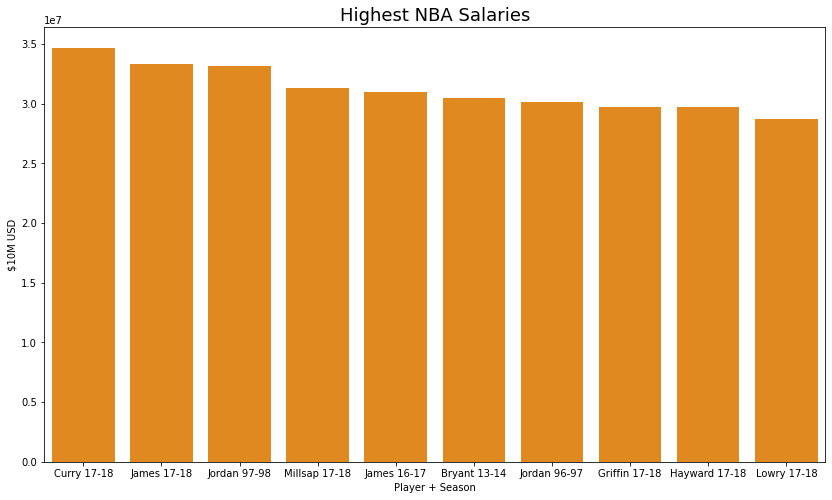

In [19]:
# plot bar graph of top NBA Salaries
plt.figure(figsize = (14,8))
ax = sns.barplot(x = 'new_id', y = 'salary', data = top_ten, color = 'darkorange')
ax.set_title("Highest NBA Salaries", fontsize = 18)
ax.set_ylabel('$10M USD')
ax.set_xlabel('Player + Season')
labels = ('Curry 17-18','James 17-18','Jordan 97-98','Millsap 17-18','James 16-17','Bryant 13-14','Jordan 96-97','Griffin 17-18','Hayward 17-18','Lowry 17-18')
ax.set_xticklabels(labels)
plt.show()

### NBA Player Shooting Hand

In [20]:
# create variable to find percentage of right and left hand shooters using the value_counts method
shooting_hand = df_salary['shoots'].value_counts(normalize=True).head(2)
shooting_hand

Right    0.916331
Left     0.083174
Name: shoots, dtype: float64

([<matplotlib.patches.Wedge at 0x12a860c10>,
 [Text(-1.0626236437258478, 0.2843079172214561, 'Right Hand'),
  Text(1.062623643725848, -0.2843079172214557, 'Left Hand')],
 [Text(-0.5796128965777352, 0.15507704575715783, '92%'),
  Text(0.5796128965777352, -0.15507704575715764, '8%')])

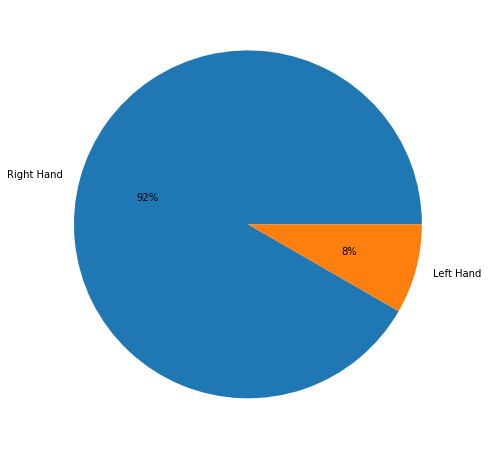

In [21]:
# create pie plot of dominant shooting hands of players
plt.figure(figsize = (14,8))
labels=['Right Hand','Left Hand']
colors = sns.color_palette('tab10')
plt.pie(shooting_hand, labels=labels, colors=colors,autopct='%.0f%%')

In [22]:
df_players.dtypes

id              object
birthDate       object
birthPlace      object
career_AST     float64
career_FG%      object
career_FG3%     object
career_FT%      object
career_G         int64
career_PER      object
career_PTS     float64
career_TRB      object
career_WS       object
career_eFG%     object
college         object
draft_pick      object
draft_round     object
draft_team      object
draft_year      object
height          object
highSchool      object
name            object
position        object
shoots          object
weight          object
first_name      object
last_name       object
dtype: object

In [23]:
df_players

,id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,college,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight,first_name,last_name
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,Duke University,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb,Alaa,Abdelnaby
1,abdulza01,"April 7, 1946","Brooklyn, New York",1.2,42.8,NaN,72.8,505,15.1,9.0,8.0,17.5,NaN,Iowa State University,5th overall,1st round,Cincinnati Royals,1968,6-9,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward and Center,Right,235lb,Zaid,Abdul-Aziz
2,abdulka01,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,24.6,11.2,273.4,55.9,"University of California, Los Angeles",1st overall,1st round,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb,Kareem,Abdul-Jabbar
3,abdulma02,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,47.2,Louisiana State University,3rd overall,1st round,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb,Mahmoud,Abdul-Rauf
4,abdulta01,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,42.2,"University of Michigan, San Jose State University",11th overall,1st round,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb,Tariq,Abdul-Wahad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,zizican01,"January 4, 1997","Split, Croatia",0.6,58.3,-,70.8,91,17.5,6.4,4.2,3.0,58.3,NaN,23rd overall,1st round,Boston Celtics,2016,6-11,NaN,Ante Zizic,Center,Right,254lb,Ante,Zizic
4681,zoetji01,"December 20, 1953","Uxbridge, Canada",0.1,20.0,-,-,7,-0.8,0.3,1.1,-0.1,20.0,Kent State University,NaN,NaN,NaN,NaN,7-1,"Port Perry in Port Perry, Canada",Jim Zoet,Center,Right,240lb,Jim,Zoet
4682,zopfbi01,"June 7, 1948",NaN,1.4,36.3,NaN,55.6,53,9.6,2.2,0.9,-0.1,NaN,Duquesne University,33rd overall,2nd round,Milwaukee Bucks,1970,6-1,"Monaca in Monaca, Pennsylvania",Bill Zopf,Point Guard,Right,170lb,Bill,Zopf
4683,zubaciv01,"March 18, 1997","Mostar, Bosnia and Herzegovina",0.8,54.0,0.0,76.1,140,17.6,6.9,4.6,5.3,54.0,NaN,32nd overall,2nd round,Los Angeles Lakers,2016,7-1,NaN,Ivica Zubac,Center,Right,240lb,Ivica,Zubac


### Player Height

I want to learn more about the height of NBA players; however, the height column is currently an **object** type. In order to find information such as the average height of NBA players, the height column needs to be converted into a **float** type. Height is currently listed in "ft-in" format. We can define a function that will split these values and convert it into something useable for graphing.

In [24]:
def height_float(ht):
    ht_ = ht.split("-")
    ft_ = float(ht_[0])
    in_ = float(ht_[1])
    return (12*ft_) + in_

df_inches = df_players["height"].apply(lambda x:height_float(x))
df_inches

0       82.0
1       81.0
2       86.0
3       73.0
4       78.0
        ... 
4680    83.0
4681    85.0
4682    73.0
4683    85.0
4684    75.0
Name: height, Length: 4685, dtype: float64

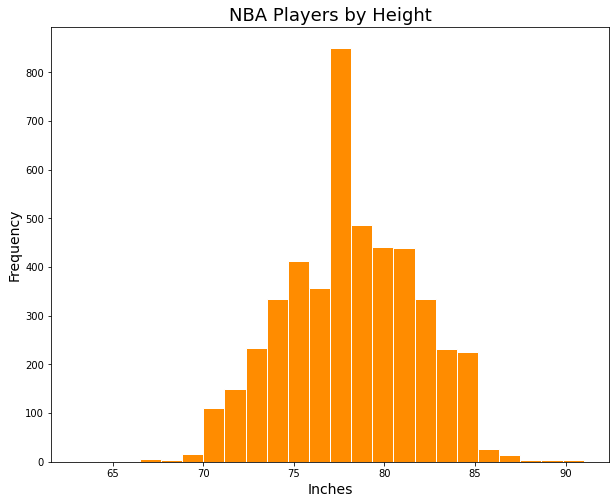

In [25]:
ax = df_inches.plot(kind='hist',
    figsize=(10,8), bins=24, edgecolor = 'white',color = 'darkorange')
ax.tick_params(axis='x', labelrotation = 0)
ax.set_title("NBA Players by Height", fontsize = 18)
ax.set_ylabel("Frequency", fontsize = 14)
ax.set_xlabel('Inches', fontsize = 14)
plt.show()

In [26]:
# finds the mean and mode of NBA Player height
print("Average NBA Player Height: " , int(df_inches.mean()),'inches')
print("Most common NBA Player Height: ", int((df_inches).mode()),'inches')

Average NBA Player Height:  78 inches
Most common NBA Player Height:  79 inches


### Top NBA Player Producing Colleges

In [27]:
# use value_counts function to add number of players that started at each college
# use describe function to count number of schools in list
df_players['college'].value_counts().describe

<bound method NDFrame.describe of University of Kentucky                                  102
University of California, Los Angeles                    90
University of North Carolina                             88
Duke University                                          75
University of Kansas                                     69
                                                       ... 
Wheeling Jesuit University                                1
University of Northern Colorado                           1
Ashland University                                        1
Jacksonville University, University of Houston            1
Seattle Pacific University, University of Washington      1
Name: college, Length: 731, dtype: int64>

In [28]:
# create variable to list the top ten schools with the greatest number of NBA players
top_college = df_players['college'].value_counts().head(10)
top_college = top_college.reset_index()

In [29]:
top_college.shape

(10, 2)

In [30]:
top_college

,index,college
0,University of Kentucky,102
1,"University of California, Los Angeles",90
2,University of North Carolina,88
3,Duke University,75
4,University of Kansas,69
5,Indiana University,60
6,University of Notre Dame,55
7,University of Louisville,55
8,University of Michigan,50
9,University of Arizona,48


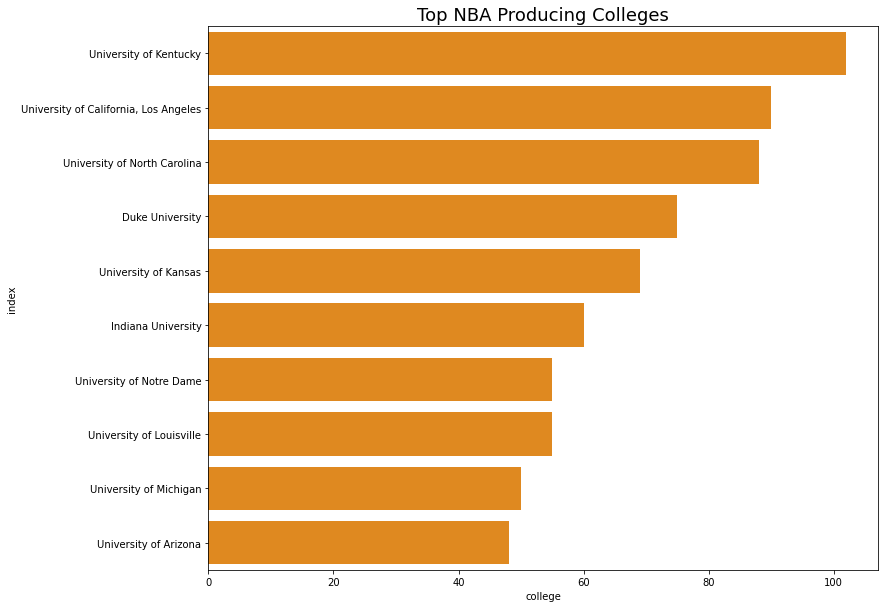

In [31]:
plt.figure(figsize = (12,10))
ax = sns.barplot(x = top_college['college'],y = top_college['index'], data = top_college, color = 'darkorange', orient = 'h')
ax.set_title("Top NBA Producing Colleges", fontsize = 18)
plt.show()

## Conclusion
Through this exploratory analysis, we were able to determine the following information:

- The highest salary up to the 2017-2018 NBA season was **$34.7 M** to **Steph Curry** in the **2017-2018** season.

- 92% of NBA Players shot with their **right** hand while 8% shot with their **left**.

- The average height of an NBA Player during the 1985-2018 period was **78 inches** or 6'6". The most common height of an NBA player during this same period was **79 inches** or 6'7".

- The college that produced the greatest number of NBA players was **University of Kentucky** with 102 total players.